# Partial Least Square Regression

Partial Least Square Regression is an analytical technique that can be used to predict the values of some unknown dependent variables from independent variables. To build the model it initially requires a set of independent variables with the known values of the dependent variables <br><br>

Large amount of code copied from : https://towardsdatascience.com/partial-least-squares-f4e6714452a

### Required Packages:

fsspec <br>
s3fs <br>
boto <br>
pandas <br>
math <br>
sklean <br>
matplotlib

## Import Data

All data (training, validation, testing) is imported from a csv of format without the header or column names
<br>

|    | ind1 | ind2 | ind3 | ind4 | ind5 | ... | dep1 | dep2 | dep3 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| spectra 1 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | ... | 4.6 | 5.7 | 2.4 | 
| spectra 2 | 5.0 | 5.3 | 6.5 | 7.7 | 8.0 | ... | 4.5 | 5.1 | 2.3 | 
| spectra 3 | 4.3 | 5.6 | 6.5 | 7.0 | 8.1 | ... | 4.4 | 5.2 | 2.4 | 
| spectra 4 | 4.2 | 5.2 | 6.3 | 7.3 | 8.2 | ... | 4.7 | 5.7 | 2.7 | 
| spectra 5 | 4.6 | 4.9 | 6.3 | 7.4 | 8.5 | ... | 4.9 | 5.8 | 2.8 | 
| spectra 6 | 5.7 | 5.7 | 6.7 | 7.3 | 8.6 | ... | 4.6 | 5.8 | 2.9 | 



In [1]:
""" #Uncommment if you have not installed these packages in your python environment
%pip install fsspec
%pip install s3fs
%pip install boto
%pip install scikit-learn
"""

import pandas as pd
import random

# import the csv file directly from an csv
file = r"C:\Users\omguser\OneDrive - University of St Andrews (1)\Documents\Data for Other People\George god1\Ghanaian Bitters\Raw Data\mergedForPLSR.csv"


data = pd.read_csv(file, header = 0,index_col =0)

#data = pd.read_csv(file)
#data = data.drop('Unnamed: 0', axis = 1)

data

,70.21813058,73.82822379,77.43626011,81.05826328,84.66218194,88.26404897,91.86386613,95.46163516,99.05735782,102.6670032,...,4443.788072,4445.019554,4446.250671,4447.481422,4448.711808,4449.941829,4451.164616,4452.39391,4453.622838,ABV
2F1,-6.30,-5.15,1.74,-2.92,-277.76,-287.04,-280.56,-345.52,-427.94,-449.25,...,-406.96,-355.19,-320.01,-278.64,-361.43,14.03,0.87,-1.85,-11.84,35
2F2,1.33,-1.53,2.41,-2.26,-224.65,-383.18,-231.49,-346.87,-216.18,-422.36,...,-362.91,-363.61,-325.38,-246.72,-388.97,12.71,-3.43,2.77,-12.17,35
2F3,7.30,8.37,0.42,-2.26,-168.17,-355.95,-251.65,-266.15,-331.33,-432.44,...,-439.58,-312.05,-319.34,-231.61,-325.48,22.61,3.51,-12.09,-12.17,35
2F4,-9.61,-6.47,-0.57,-9.19,-232.72,-316.62,-260.73,-398.32,-406.06,-407.23,...,-455.72,-355.53,-386.86,-290.06,-414.17,29.54,-0.45,-10.10,-9.20,35
2F5,0.00,10.02,-5.85,-15.46,-334.91,-279.64,-238.88,-305.83,-279.14,-321.85,...,-554.91,-286.09,-356.96,-223.88,-391.32,10.40,-1.78,8.38,4.34,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WW6,-3.48,9.53,7.52,-9.03,-388.85,-392.09,-228.29,-476.83,-394.78,-442.36,...,-553.39,-401.87,-417.94,-220.35,-430.12,8.91,-12.18,0.96,3.84,42
WW7,-0.33,6.72,-1.23,-5.89,-349.36,-371.75,-310.80,-387.89,-335.03,-493.62,...,-355.51,-389.57,-412.73,-342.12,-427.94,17.00,-0.12,2.11,-11.84,42
WW8,6.14,2.27,-6.68,-2.42,-382.13,-373.27,-267.95,-343.00,-415.31,-410.43,...,-544.65,-470.95,-420.29,-357.74,-399.22,6.60,-2.60,6.57,-1.44,42
WW9,-2.15,6.89,6.86,-12.66,-338.10,-424.02,-305.60,-389.74,-336.88,-453.12,...,-500.61,-425.79,-357.13,-273.43,-378.39,12.21,-3.92,-0.70,-1.77,42


## Split the data into training, validation, and test data

Depending on the amount of data, split it into training, validation and test data

In [2]:

# Split data in train, val, test, ensue that they add to 100
percentage_train =  60
percentage_validation = 20
percentage_test = 20

num_depen_var = 1

trainingRows = []
validationRows = []
testingRows = []

numRows = data.shape[0]
numTrainRows = (int)(numRows * percentage_train/100)
numValidationRows = (int)(numRows * (percentage_validation)/100)
numTestingRows = numRows - (numTrainRows + numValidationRows)

#randomly select the rows for training, validation, and testing data
for row in range(numRows):
    successful = False
    while not successful:
        randomNumber = random.random()
    
        if(randomNumber < percentage_train/100.0 and len(trainingRows) < numTrainRows):
            trainingRows.append(row)
            successful = True
        elif(randomNumber < (percentage_train+percentage_validation)/100.0 and len(validationRows) < numValidationRows):
            validationRows.append(row)
            successful = True
        elif(len(testingRows) < numTestingRows):
            testingRows.append(row)
            successful = True
        #end if
#end for

# select the data using the randomly selected rows
train = data.iloc[trainingRows]
val = data.iloc[validationRows]
test = data.iloc[testingRows]

# Split the columns in X and Y
X_colnames = data.columns[:-num_depen_var]
Y_colnames = data.columns[-num_depen_var:]

# Split each train, val and test into two arrays
X_train = train[X_colnames].values
Y_train = train[Y_colnames].values

X_val = val[X_colnames].values
Y_val = val[Y_colnames].values

X_test = test[X_colnames].values
Y_test = test[Y_colnames].values


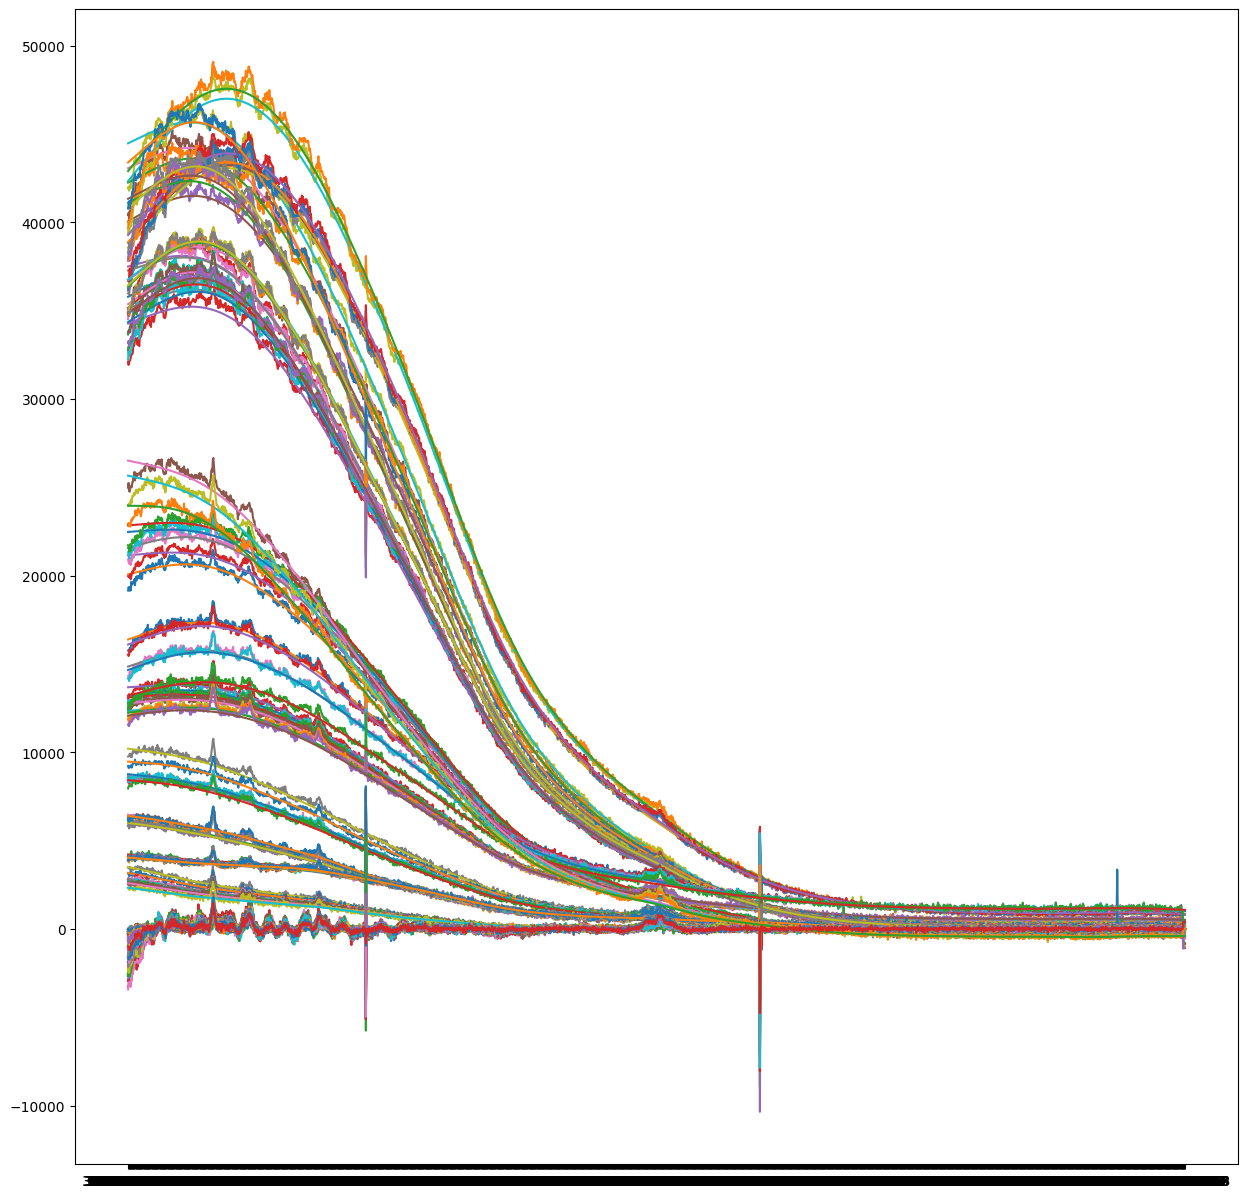

In [3]:
#test using derivatives instead

from scipy.signal import savgol_filter
import matplotlib.pyplot as plt


#X_train1 = X_train
#X_train1 = savgol_filter(X_train1, 17, polyorder=5, deriv = 1)

#X_train2 = X_train
#X_train2 = savgol_filter(X_train2, 17, polyorder=5, deriv = 2)

fig, axes = plt.subplots(1,1,figsize=(15,15))
#axes[0].plot(data.columns[:-1], X_train[0:50].T)
#axes[1].plot(data.columns[:-1], X_train1[0:50].T)
#axes[2].plot(data.columns[:-1], X_train2[0:50].T)

#print(data.columns[:-1])


#X_train = savgol_filter(X_train, 17, polyorder=5, deriv = 1)
#X_val = savgol_filter(X_val, 17, polyorder=5, deriv = 1)
#X_test = savgol_filter(X_test, 17, polyorder=5, deriv = 1)


import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve_banded

from pybaselines import Baseline, utils

def baseline_als_optimized(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    D = lam * D.dot(D.transpose()) # Precompute this term since it does not depend on `w`
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w) # Do not create a new matrix, just update diagonal values
        Z = W + D
        z = spsolve(Z, w*y)
        w = np.where(y<=z, 0.998, np.exp(z-y))
    return z


startIndx = 85
sampleIndxArr = np.arange(numTrainRows)

#background = baseline_als_optimized(X_train[sampleIndx].T[startIndx:], 1e5, 0.1,500)
#axes.plot(data.columns[startIndx:-1], X_train[sampleIndx].T[startIndx:])
#axes.plot(data.columns[startIndx:-1], background)


baseline_fitter = Baseline(x_data=data.columns[startIndx:-1])

for sampleIndx in sampleIndxArr:
    bkg_1, params_1 = baseline_fitter.modpoly(X_train[sampleIndx].T[startIndx:], poly_order=3)
    bkg_2, params_2 = baseline_fitter.aspls(X_train[sampleIndx].T[startIndx:], lam = 4e7)
    bkg_3, params_3 = baseline_fitter.swima(X_train[sampleIndx].T[startIndx:])
    bkg_4, params_4 = baseline_fitter.snip(
        X_train[sampleIndx].T[startIndx:], max_half_window=40, decreasing=True, smooth_half_window=3
    )

    #axes.plot(data.columns[startIndx:-1], bkg_1)
    axes.plot(data.columns[startIndx:-1], X_train[sampleIndx].T[startIndx:])
    axes.plot(data.columns[startIndx:-1], bkg_2)
    axes.plot(data.columns[startIndx:-1], X_train[sampleIndx].T[startIndx:]- bkg_2)
    #axes.plot(data.columns[startIndx:-1], bkg_3)
    #axes.plot(data.columns[startIndx:-1], bkg_4)
    
plt.show()

### Different examples of using PLSRegression showing the number of components changes the accuracy of the PLSRegression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=len(X_train), scale=True)
my_plsr.fit(X_train, Y_train)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Compute the validation error for each n_comp 
water_plot = []

for n_comp in range(1, len(X_train)+1):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  water_rmse = sqrt(mean_squared_error(Y_val[:,0] ,preds[:,0]))
  
  water_plot.append( water_rmse)

# Create the three plots using matplotlib
fig, axs = plt.subplots(1)

axs.plot(range(1, len(X_train)+1), water_plot)

fig.show()

## Find the best number of components for the best R2 score

In [ ]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=len(X_train), scale=True)
my_plsr.fit(X_train, Y_train)

best_ncomp = 1
my_plsr = PLSRegression(n_components=best_ncomp, scale=True)
my_plsr.fit(X_train, Y_train)
preds = my_plsr.predict(X_val)

best_r2 = r2_score(preds, Y_val)

for n_comp in range(2, len(X_train)+1):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  r2 = r2_score(preds, Y_val)
  if r2 > best_r2:
    best_r2 = r2
    best_ncomp = n_comp

print(best_r2, best_ncomp)

## Run on the test data, getting the r2-score

In [ ]:
best_model = PLSRegression(n_components=best_ncomp, scale=True)
best_model.fit(X_train, Y_train)
test_preds = best_model.predict(X_test)
print(r2_score(Y_test, test_preds))



In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(5, 5))

pls = PLSRegression(n_components=best_ncomp)
pls.fit(X_train, Y_train)


axes.scatter(pls.transform(X_test)[:,0], Y_test[:,0], alpha=0.3, label="ground truth")
axes.scatter(pls.transform(X_test)[:,0], pls.predict(X_test)[:,0], alpha=0.3, label="predictions")
axes.set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes.legend()
plt.show()

## Calculate the values of dependent variables with the model

In [ ]:
# import the csv file directly from an s3 bucket
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\Small Bottle Yes Rotation Minimal Bottle peaks in spectra random.csv"
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\Small Bottle No Rotation Minimal Bottle peaks in spectra.csv"
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\test of program.csv"
#data = pd.read_csv(file, header = 1)
#data = data.drop('Unnamed: 0', axis = 1)
#data

#num_depen_var = 3

# Split the columns in X and Y
#X_colnames = data.columns[:-num_depen_var]
#Y_colnames = data.columns[-num_depen_var:]

#unknown = data.iloc[:,:]

# Split each train, val and test into two arrays
#X_unknown = unknown[X_colnames].values
#Y_unknown = unknown[Y_colnames].values

#best_model = PLSRegression(n_components=best_ncomp, scale=True)
#best_model.fit(X_train, Y_train)
preds = best_model.predict(X_test)
#preds2 = best_model.predict(X_unknown)
#print(preds)
for i in range(len(preds)):
    print(i)
    print(Y_test[i])
    print(preds[i])
    #print(Y_unknown[i])
    #print(preds2[i])
    print("sum: " + str(sum(preds[i])))
    print("\n")